In [54]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings(action = "ignore", module = "scipy", message = "^internal gelsd")

import plotly.plotly as py
import plotly.graph_objs as go

In [55]:
# loading data
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', delim_whitespace = True, names = names)

In [56]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.90,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.90,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242.0,17.8,392.83,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222.0,18.7,394.63,2.94,33.4
4,6.91e-02,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222.0,18.7,396.90,5.33,36.2


In [57]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Text(0.5, 1, 'Correlation between Features')

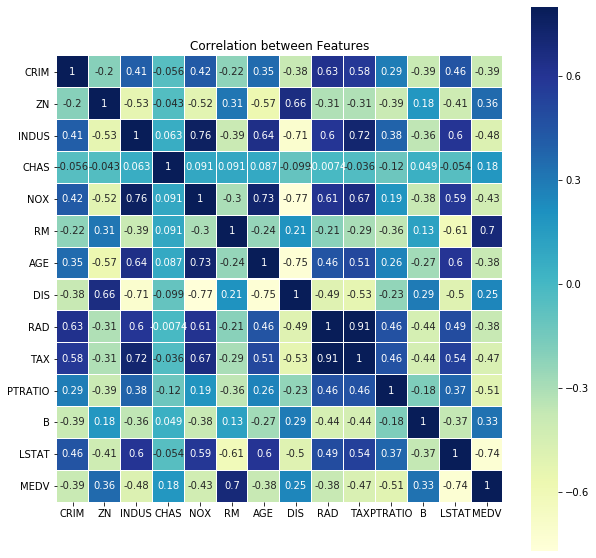

In [58]:
# correlation matrix
pd.set_option('precision', 2)
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, vmax = .8, linewidths = 0.01, square = True, annot = True, cmap = 'YlGnBu', linecolor = 'white')
plt.title('Correlation between Features')


In [59]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', delim_whitespace = True, names = names)
# drop certain features
y = df['MEDV'] # the response variable
df = df.drop(['ZN', 'DIS', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD'], axis = 1)
X = df.drop('MEDV', axis = 1) # the features
df.head()

,CHAS,RM,TAX,PTRATIO,B,LSTAT,MEDV
0,0,6.58,296.0,15.3,396.90,4.98,24.0
1,0,6.42,242.0,17.8,396.90,9.14,21.6
2,0,7.18,242.0,17.8,392.83,4.03,34.7
3,0,7.00,222.0,18.7,394.63,2.94,33.4
4,0,7.15,222.0,18.7,396.90,5.33,36.2


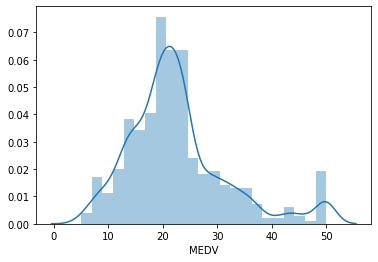

In [60]:
# MEDV (median value) is our response variable and the remainders are the predictors
# distribution of MEDV
sns.distplot(y)

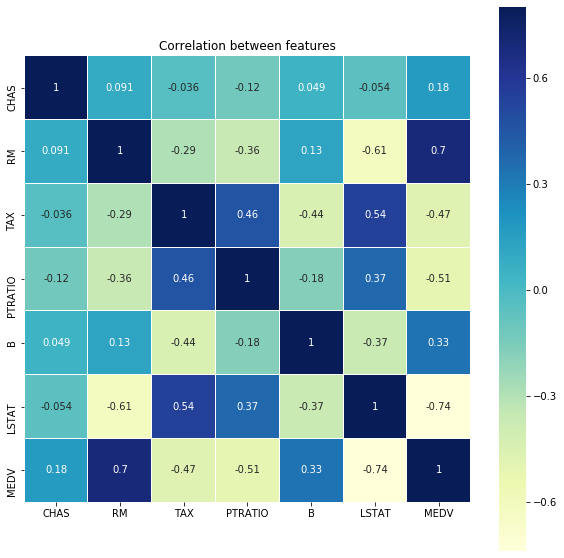

In [61]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

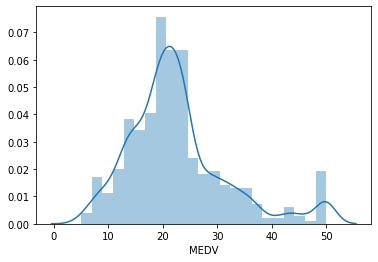

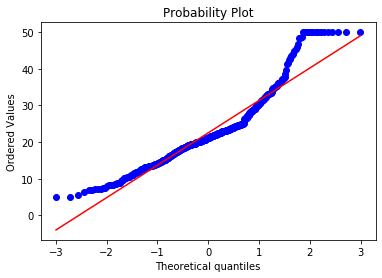

In [62]:
from scipy import stats
# histogram and normal probability plot
sns.distplot(y, hist = True)
fit = plt.figure()
res = stats.probplot(y, plot = plt)

Based on the histogram and the probability plot the response variable does not seem to follow a normal distribution (the diagonal line). We can transform the data to resolve this.

In [107]:
# Data Preparataion
# split between training and testing sets, (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# scaling the data
scaler = StandardScaler().fit(X_train)
rescaled_X = scaler.transform(X_train)
rescaled_X_test = scaler.transform(X_test)

def fit_model(regr, X_train, y_train, y_test, rescaled_X_test):
    
    # fit model
    model = regr.fit(X_train, y_train)
    # predictions
    predictions = model.predict(rescaled_X_test)
    # MSE
    print(mean_squared_error(y_test, predictions))
    # R-squared
    print(model.score(rescaled_X_test, y_test))

155.120477116835
-0.4832604233970339


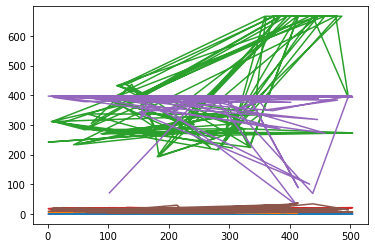

In [105]:
# Linear Regression Model
regr_LR = LinearRegression()
predictions_LR = fit_model(regr_LR, X_train, y_train, y_test, rescaled_X_test)

153.5725039781565
-0.4684587200000405


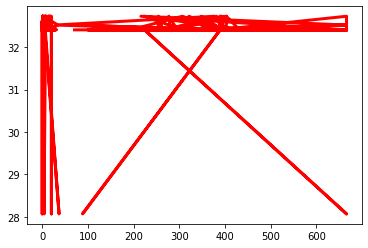

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting Regressor
regr_GBR = GradientBoostingRegressor(random_state = 10, n_estimators = 400)
predictions_GBR = fit_model(regr_GBR, X_train, y_train, y_test, rescaled_X_test)

plt.plot(X_test, predictions_GBR, color = 'red', linewidth = 3)

In [92]:
from sklearn.linear_model import Ridge
# Ridge Regression
regr_Ridge = Ridge(alpha = 0.5, random_state = 10)
fit_model(regr_Ridge, X_train, y_train, y_test, rescaled_X_test)

152.17972303147792
-0.45514096276342597


In [93]:
from sklearn.linear_model import Lasso
# Lasso Regression
regr_Lasso = Lasso(alpha = 0.5, random_state = 10)
fit_model(regr_Lasso, X_train, y_train, y_test, rescaled_X_test)

53.33270560116152
0.49003321185438187


In [94]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regression
regr_DT = DecisionTreeRegressor(random_state = 10)
fit_model(regr_DT, X_train, y_train, y_test, rescaled_X_test)

716.1730392156862
-5.84803931187311


In [109]:
# Elastic Net Regression

# find the best hyperparameters
elastic = ElasticNet(normalize = True)
search = GridSearchCV(estimator = elastic,
                    param_grid = {'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},
                    scoring = 'neg_mean_squared_error',n_jobs = 1,refit = True,cv = 10)
search.fit(X_train, y_train)
search.best_params_

C:\Users\jsteven.raquel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



{'alpha': 0.0001, 'l1_ratio': 0.2}

In [112]:
regr_Elastic = ElasticNet(normalize = True, alpha = 0.01, l1_ratio = 0.8)
fit_model(regr_Elastic, X_train, y_train, y_test, rescaled_X_test)

106.39568745814898
-0.017354480594653943
